# Introduction to $\Delta Q$ - working with Quality Attenutation

$\Delta Q$ is an approach to engaging with performance in all stages of a system's lifecyle. It can capture requirements, specify constraints, measure operation and assure performance at both a component and system level.

## Quality Attenutation 

Computing things, communicating things takes time (and can sometimes not happen); Quality attenutation is the measure of how far from instantaneous and perfect.

 - $\Delta Q$ takes the notion of [probability](https://en.wikipedia.org/wiki/Probability_theory) and extends to incorporate the notion of failure. This has several advantages:
   - Much of the basic properties of probability carry over, in particular those concepts that arise from convolution[^seqcomp].
   - It fuses two key aspects of performance (and reliablity) into single concept, combining the _continuous_ (e.g. delay) with the _discrete_ (loss, erasure, failure ...). This ensures that they are both thought about and manipulated together as a single logical entity.

[^seqcomp]: 
Convolution, in this context, captures the notion of sequential compositionality.

It can be helpful, to get to grips with the concept, to think in terms of packets flowing in a network, however don't forget that this concept is more powerful that that, it can be applied to many aspects of "systems" - as it can encompass performance aspects of computation, allow for abstraction to hide details of components and even help model emergent aspects of humans-in-the-loop. 
   
Quality attenutation has some interesting properties: 
  - it is _conserved_ - if something fails, or a packet is lost, you can't "un-fail" or "un-loose" - you have to start again or resend. If a delay has occured you can't "un-delay" something. Quality attenutation is something you (often) want to minimise.
  - it is "additative" - so it possible to talk in term of "a $\Delta Q$ (quality attenutation) budget"
  - in distributed system context it is often possible to express it terms of a [basis set](https://en.wikipedia.org/wiki/Basis#Mathematics), a bit like [$x, y, z$ co-ordinates](https://en.wikipedia.org/wiki/Standard_basis). This helps inform questions like "how much longer will something twice as big/complex take", it is rarely exactly twice the time!
  
  
Quality attenutation is a _privation_ - it is something that you seek to minimise in your system (like cold is the absence of heat, silence the absence of noise). It is an irony that many seek to "add quality" to their systems - now you know that what they _really_ seek is the reduction of quality attenutation.  

## Outcomes

 - distributed system performance is more usually discussed in terms of the _system_, e.g. its efficiency, its throughput etc. It is an internal focus.
 - real world systems are more often judged by the _outcomes_ they enable. This is a external focus. Formulating expectations in terms of $\Delta Q$ enables the keeping the performance goals under consideration - keeps _performance as a first class citizen_ throughout the SDLC ([System Development Life Cycle](https://en.wikipedia.org/wiki/Systems_development_life_cycle)).
 - an overall systemtic outcome is often made up of collection of other outcomes on which it depends, those precursor outcomes will have a dependency pattern (i.e certain things have to happen in sequence, some can happen in parallel).

## Probabilty, Performance and Outcomes

How do you measure the performance of an outcome?

To observe an outcome need to observe its start and its end.  If you observe[^freq] many instances of such an outcome you can create distribution of the time to complete the outcome. From such distributions you can forumlate the answer to such questions as:

[^freq]: Alltough this is expressing this in [frequentist terms](https://en.wikipedia.org/wiki/Frequentist_probability) - which would be appropriate for analysing a running system, it is often more helpful to consider $\Delta Q$ in [Bayesian terms](https://en.wikipedia.org/wiki/Bayesian_probability), as a probability not a frequency.


  - What delay would 50%, 75%, 90% of the outcomes experience?
  - What fraction of outcomes would happen in $x$ seconds?
  - What is the difference in delay between 10% and 90% of the outcomes?
  
With $\Delta Q$ we are admitting the possiblity that not all outcomes will have an observable end. The outcome might fail (the packet lost, the remote system stop working) - sometimes that would be directly observable (e.g. remote system sends an error response) and sometimes not. In general there will be some maximum time, after which, a response - where it to arrive - would make no difference to the usefulness of the outcome. Conceptually you could think of the outcome ocurring after some unbounded time, which fine in the mathematical formulation, but not useful operationally.

In [2]:
import           DeltaQ.RationalProbabilityDoubleDelay
import Shim

expression, expression1, expression2 :: DeltaQ
expression = perfection `convolve` bottom
expression1 = choose 0.75 perfection bottom
expression2 = uniform 2 3

In [6]:
import  DeltaQ.Algebra.Simplification

expression

canonicaliseDeltaQ expression

expression1

canonicaliseDeltaQ expression1

expression2

canonicaliseDeltaQ (choose 0.75 (uniform 2 2 `convolve` uniform 2 2) bottom :: DeltaQ)

expression1 `convolve` expression1
canonicaliseDeltaQ (canonicaliseDeltaQ expression1 `convolve` canonicaliseDeltaQ expression1)

$$ \mathop{\leftrightharpoons}^{p}_{q}$$

# Additional Materials

## $\Delta Q$ 
## Treating performance as a first class citizen in distributed system design
  - PeNDAR public outputs

In [5]:
import Graphics.Rendering.Chart.Easy
import IHaskell.Display.Charts

signal :: [Double] -> [(Double,Double)]
signal xs = [ (x,(sin (x*3.14159/45) + 1) / 2 * (sin (x*3.14159/5))) | x <- xs ]

main :: Renderable ()
main = toRenderable $ do
    layout_title .= "Amplitude Modulation"
    plot (line "am" [signal [0,(0.5)..400]])
    plot (points "am points" (signal [0,7..400]))


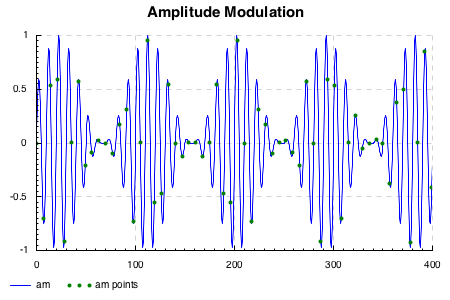

In [6]:
main
